# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
data = pd.read_csv('/Users/User/Downloads/survey lung cancer.csv')
df = pd.DataFrame(data)

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.shape

(309, 16)

In [5]:
df.info

<bound method DataFrame.info of     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1    

In [6]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


# Data Pre-Processing And Preparation

In [7]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [8]:
df.duplicated().sum()

33

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(276, 16)

In [10]:
#Convert categorical labels to numerical
from sklearn.preprocessing import LabelEncoder

for categorical_column in df:
    if categorical_column == 'AGE':
            continue
    df[categorical_column]=LabelEncoder().fit_transform(df[categorical_column])

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


# Exploratory Data Analysis

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


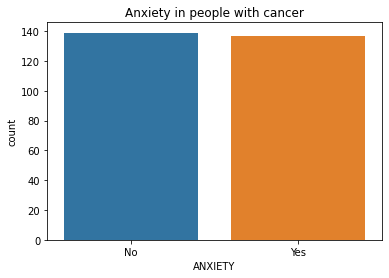

YES = 142
NO = 128


In [11]:
df_lung_cancer = df[df["LUNG_CANCER"]=='YES']
sns.countplot(df["ANXIETY"])
plt.title("Anxiety in people with cancer")
plt.xticks([0, 1], ('No', 'Yes'))
plt.show()
print("YES = 142")
print("NO = 128")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


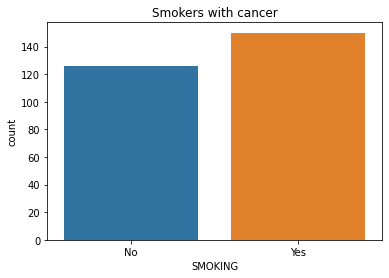

In [12]:
sns.countplot(df["SMOKING"])
plt.title("Smokers with cancer")
plt.xticks([0, 1], ('No', 'Yes'))
plt.show()

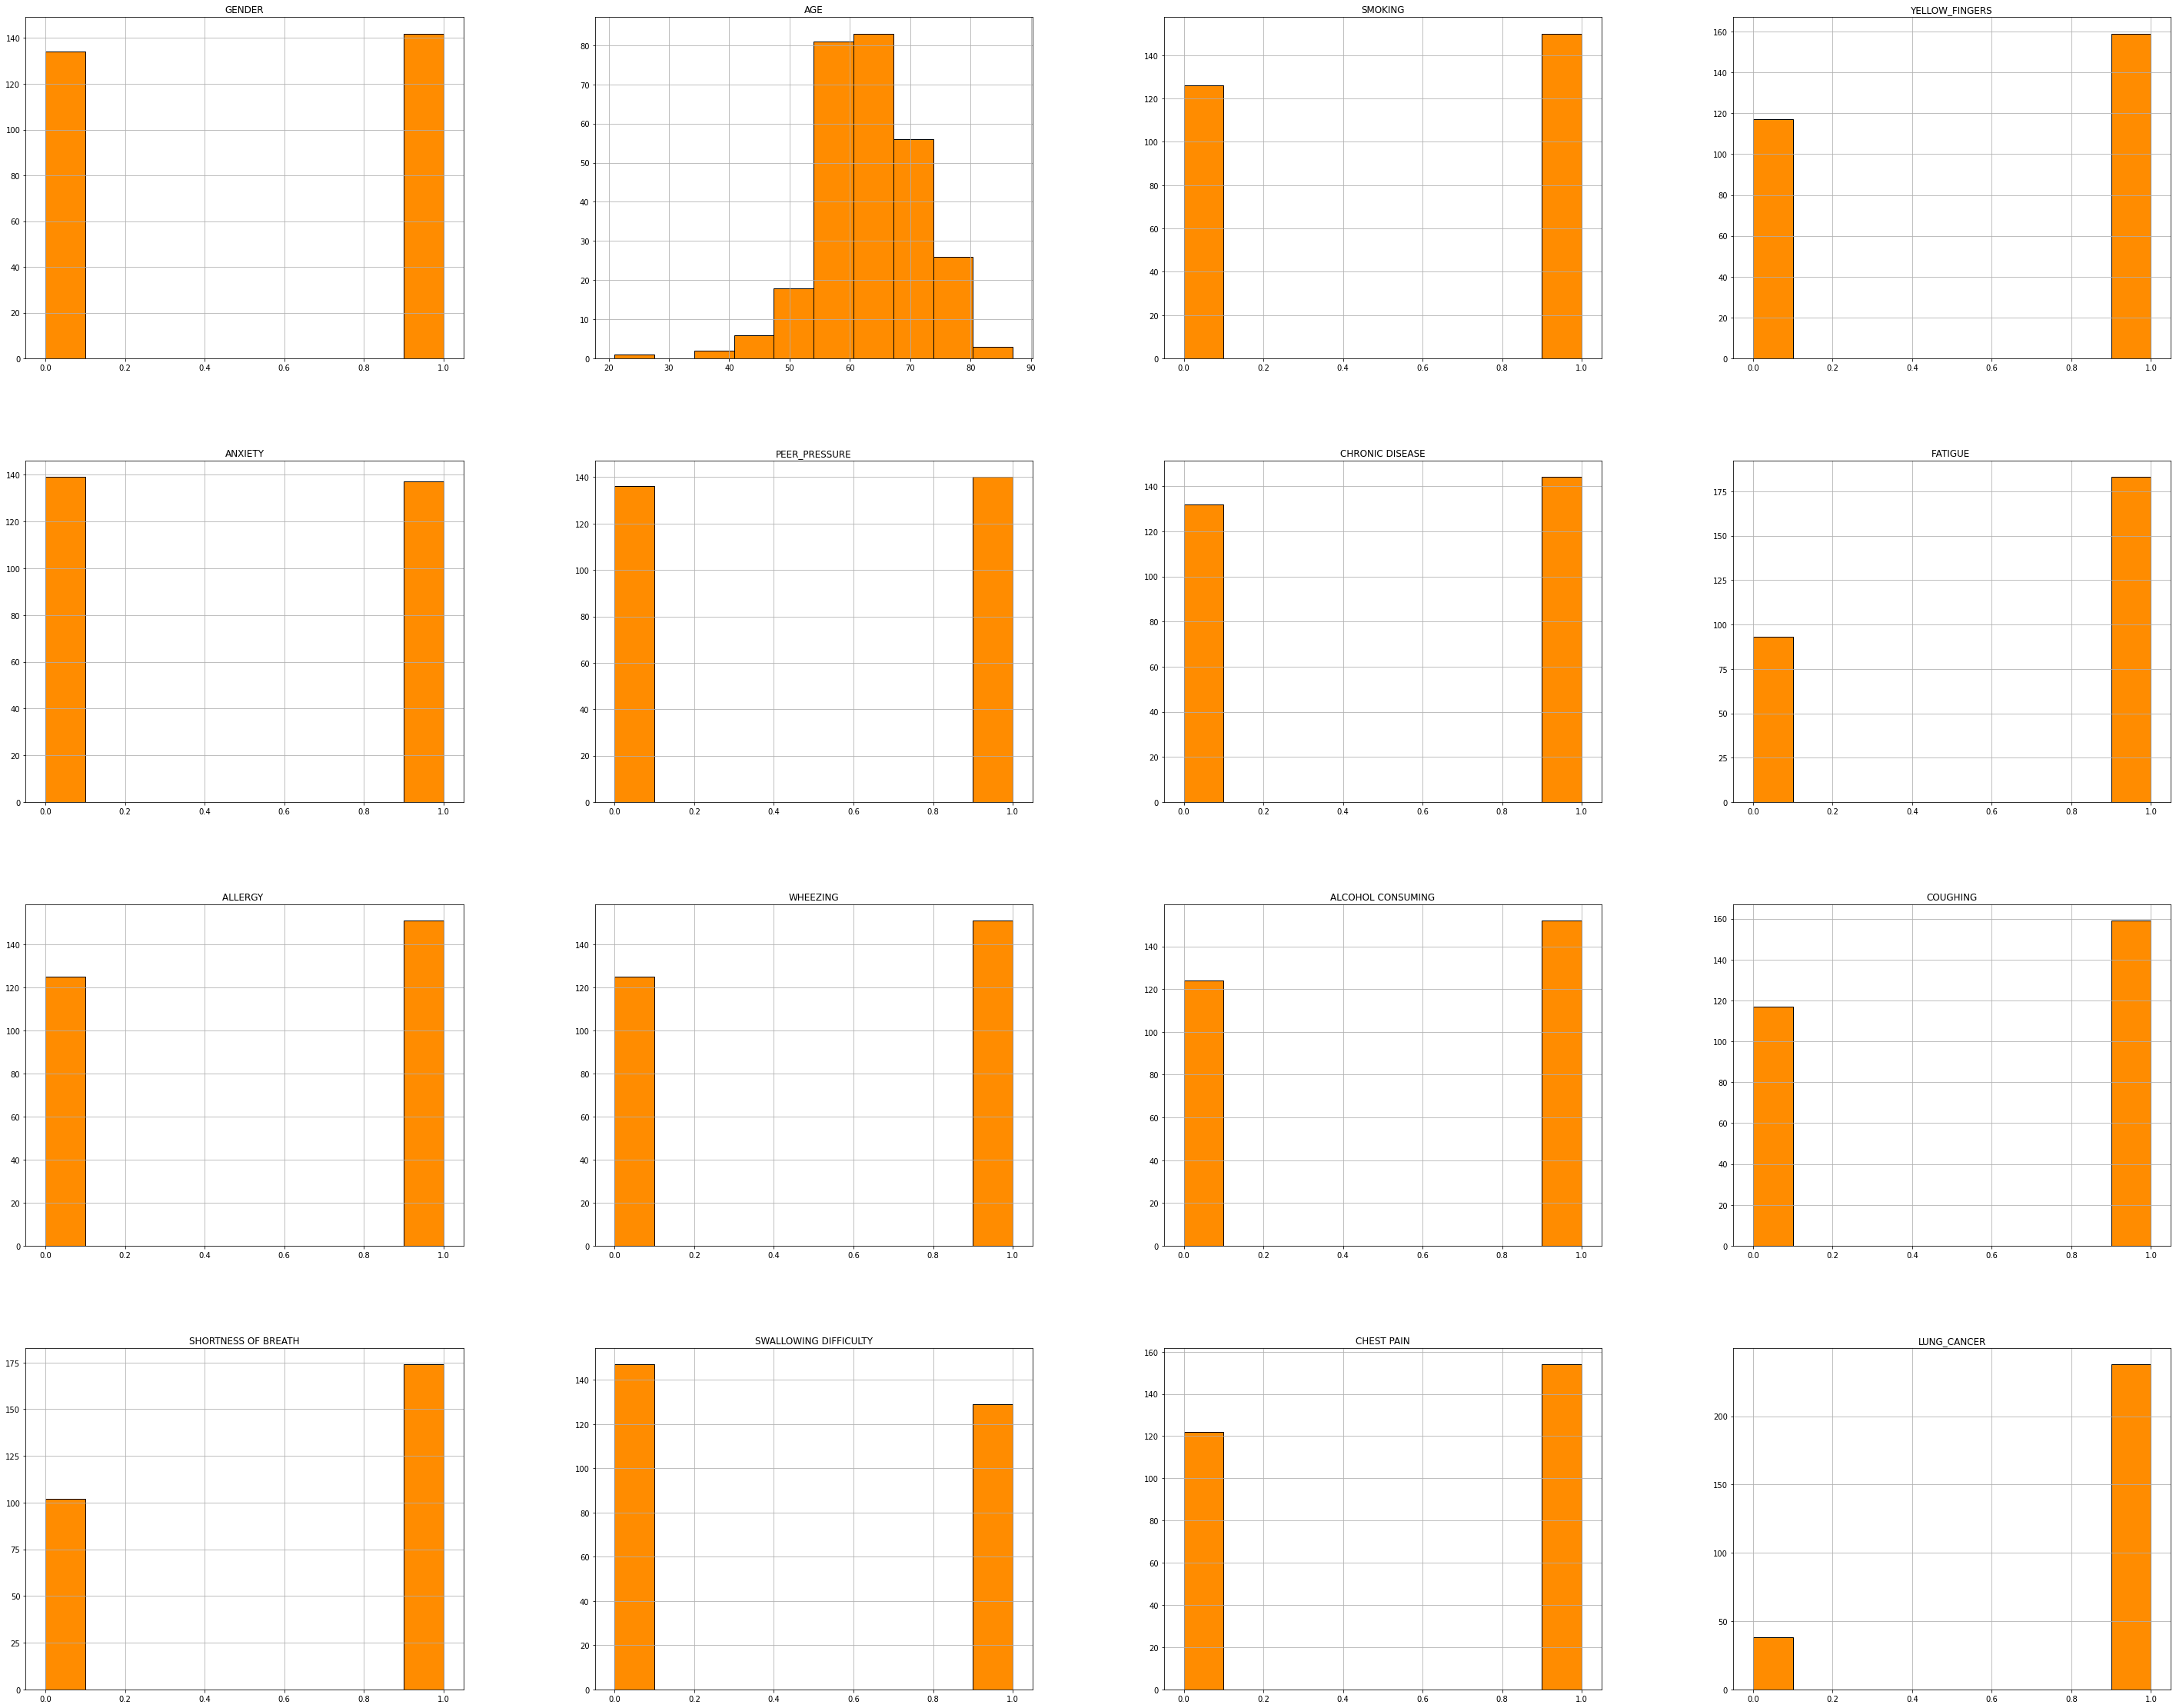

In [13]:
df.hist(figsize = (50,40),color = 'darkorange',edgecolor = 'black');

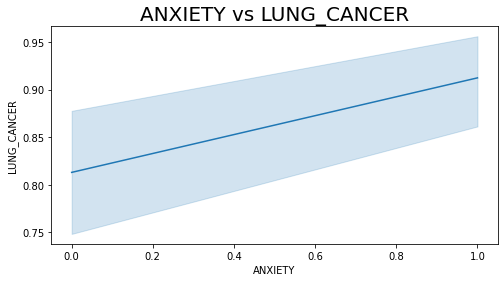

In [14]:
plt.figure(figsize=(8,4))
sns.lineplot(x=df["ANXIETY"], y=df["LUNG_CANCER"])
plt.title("ANXIETY vs LUNG_CANCER", size=20)
plt.show()

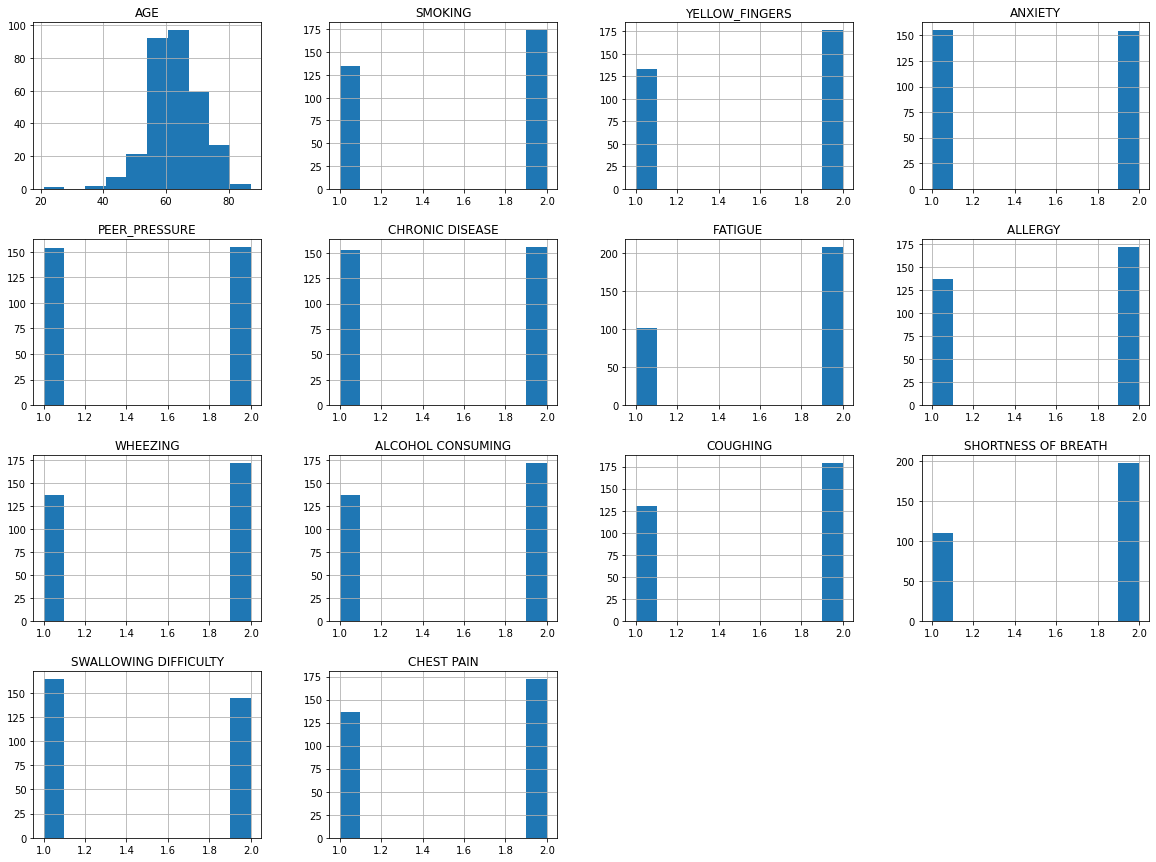

In [15]:
data.hist(figsize=(20, 15));
plt.show()

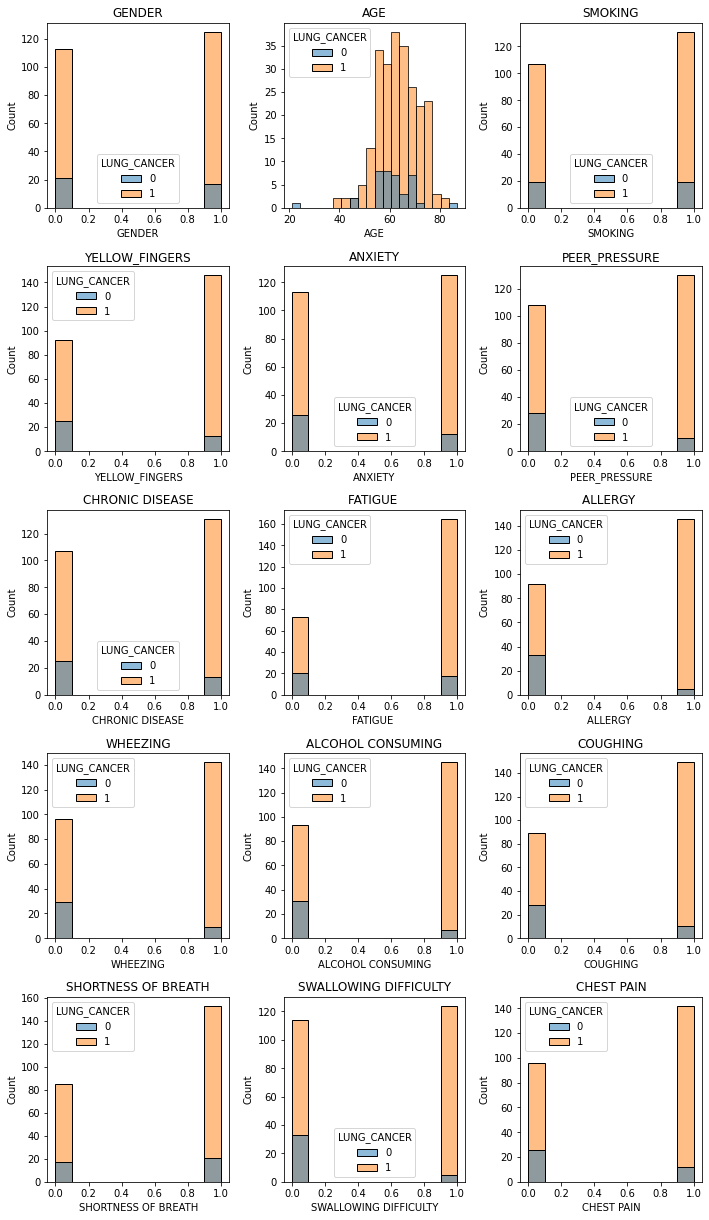

In [16]:
num_list=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig = plt.figure(figsize=(10,20))

for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=df[num_list[i]],hue='LUNG_CANCER')

plt.tight_layout()

# Splitting dataset into train and test data

In [17]:
X = df.iloc[:,:-1]
y = df['LUNG_CANCER']

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3,test_size=0.2)


In [19]:
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()

X_train_scaled=pd.DataFrame(scale.fit_transform(X_train),columns=X_train.columns)

X_train_scaled

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0.0,0.636364,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1,0.0,0.545455,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.515152,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.712121,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
4,1.0,0.606061,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,1.0,0.696970,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
216,0.0,0.757576,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
217,1.0,0.757576,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
218,0.0,0.848485,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


In [20]:
X_test_scaled = pd.DataFrame(scale.fit_transform(X_test),columns=X_test.columns)
X_test_scaled

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0.0,0.176471,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.500000,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,0.0,1.000000,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3,0.0,0.235294,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.294118,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1.0,0.411765,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
6,0.0,0.352941,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.264706,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
8,0.0,0.647059,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
9,1.0,0.823529,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


# Correlation Matrix

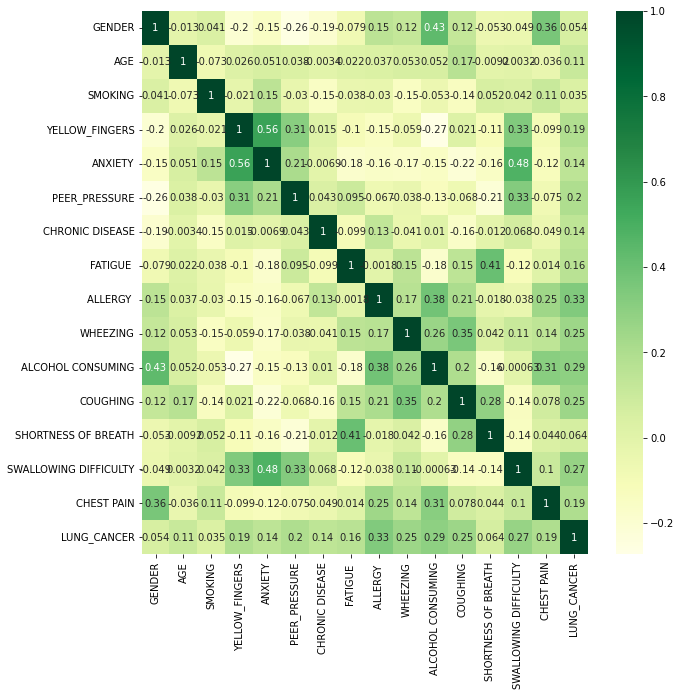

In [21]:
corr = df.corr()
features = corr.index
plt.figure(figsize=(10,10))
ax = sns.heatmap(df[features].corr(), annot=True, cmap='YlGn')


# Iterative Model Selection

Precision, Recall, and Accuracy are the usual choices, or F1-score if you care about both Precision and Recall as it is their harmonic mean.
Precision tells us, of the samples that we predict to be positive how many were actually positive.
Recall tells us, of the samples that could have been positive, how many did we correctly predict to be positive.
Accuracy gives us an idea of how good the model is overall, but doesn't give us a metric to account for false negatives (positive lung cancer cases that were predicted to be negative)
Out of these options, we are most interested in Recall because we don't want to miss any positive LUNG_CANCER cases.
Let's try out a few models and see what works best:


1. Logisitic Regression Classifier
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier
4. ADA Boosting Classifier
5. Support Vector Machine Classifier

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
lr = LogisticRegression(random_state=42)

# Fit the model to the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy:', accuracy)


Logistic Regression Accuracy: 0.8214285714285714


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM Algorithm

In [23]:
from sklearn.svm import SVC

# Create the SVM model
svm = SVC(kernel='linear', random_state=42)

# Fit the model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print('SVM Accuracy:', accuracy)


SVM Accuracy: 0.8214285714285714


# KNeighborsClassifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print('KNN Accuracy:', accuracy)

KNN Accuracy: 0.8571428571428571


# AdaBoost Classifier

In [25]:
from sklearn.ensemble import AdaBoostClassifier

# Create the AdaBoost classifier
abc = AdaBoostClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
abc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = abc.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print('AdaBoost Accuracy:', accuracy)


AdaBoost Accuracy: 0.8035714285714286


# Random Forest Classification

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
prediction


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
accuracy = metrics.accuracy_score(y_test,prediction)
accuracy

0.8214285714285714

Score :  0.8214285714285714


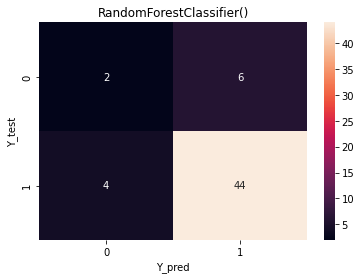

In [28]:
from sklearn.metrics import confusion_matrix
pred_list = [model]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

# Deployment Of Our Model

In [29]:
import pickle

In [30]:
filename = "Trained_model.sav"
pickle.dump(model,open(filename,'wb'))

In [31]:
loaded_model = pickle.load(open("Trained_model.sav",'rb'),encoding = 'utf-8')

In [ ]:
def normalize_option(option):
    return option.lower() in ['yes', 'true', '1', 'y']

inputs = {}

inputs['GENDER'] = input("Enter your gender (1/): ")
inputs['AGE'] = int(input("Enter your age: "))
inputs['SMOKING'] = normalize_option(input("Do you smoke? (Yes/No): "))
inputs['YELLOW_FINGERS'] = normalize_option(input("Do you have yellow fingers? (Yes/No): "))
inputs['ANXIETY'] = normalize_option(input("Do you suffer from anxiety? (Yes/No): "))
inputs['PEER_PRESSURE'] = normalize_option(input("Do you feel peer pressure to smoke? (Yes/No): "))
inputs['CHRONIC DISEASE'] = normalize_option(input("Do you have any chronic disease? (Yes/No): "))
inputs['FATIGUE'] = normalize_option(input("Do you experience fatigue? (Yes/No): "))
inputs['ALLERGY'] = normalize_option(input("Do you have any allergies? (Yes/No): "))
inputs['WHEEZING'] = normalize_option(input("Do you experience wheezing? (Yes/No): "))
inputs['ALCOHOL CONSUMING'] = normalize_option(input("Do you consume alcohol? (Yes/No): "))
inputs['COUGHING'] = normalize_option(input("Do you experience coughing? (Yes/No): "))
inputs['SHORTNESS OF BREATH'] = normalize_option(input("Do you experience shortness of breath? (Yes/No): "))
inputs['SWALLOWING DIFFICULTY'] = normalize_option(input("Do you have difficulty swallowing? (Yes/No): "))
inputs['CHEST PAIN'] = normalize_option(input("Do you experience chest pain? (Yes/No): "))
inputs['LUNG_CANCER'] = ""

print(inputs)
# assume that we have a trained model object called "model"
# this is a mock model that simply returns a random prediction

import random

def predict(model, inputs):
    input_array = []
    for key in inputs.keys():
        if key != 'LUNG_CANCER':
            input_array.append(inputs[key])
    prediction = model.predict([input_array])
    return prediction[0]

prediction = predict(model, inputs)
print("The model predicts that the person's lung cancer status is:", prediction)